# Data Science Salaries 2023

## Download the data

https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023

In [128]:
import pandas as pd

DATASET_PATH = "./datasets/salaries/ds_salaries.csv"

salaries = pd.read_csv(DATASET_PATH)

## Data structure

In [129]:
salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [130]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [131]:
salaries.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [132]:
import matplotlib.pyplot as plt

cat_attributes = list(salaries.select_dtypes(include=["object"]))
num_attributes = list(salaries.select_dtypes(include=["int64"]))

print("Cat attributes: ", cat_attributes)
print("Num attributes: ", num_attributes)

Cat attributes:  ['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']
Num attributes:  ['work_year', 'salary', 'salary_in_usd', 'remote_ratio']


array([[<Axes: title={'center': 'work_year'}>,
        <Axes: title={'center': 'salary'}>],
       [<Axes: title={'center': 'salary_in_usd'}>,
        <Axes: title={'center': 'remote_ratio'}>]], dtype=object)

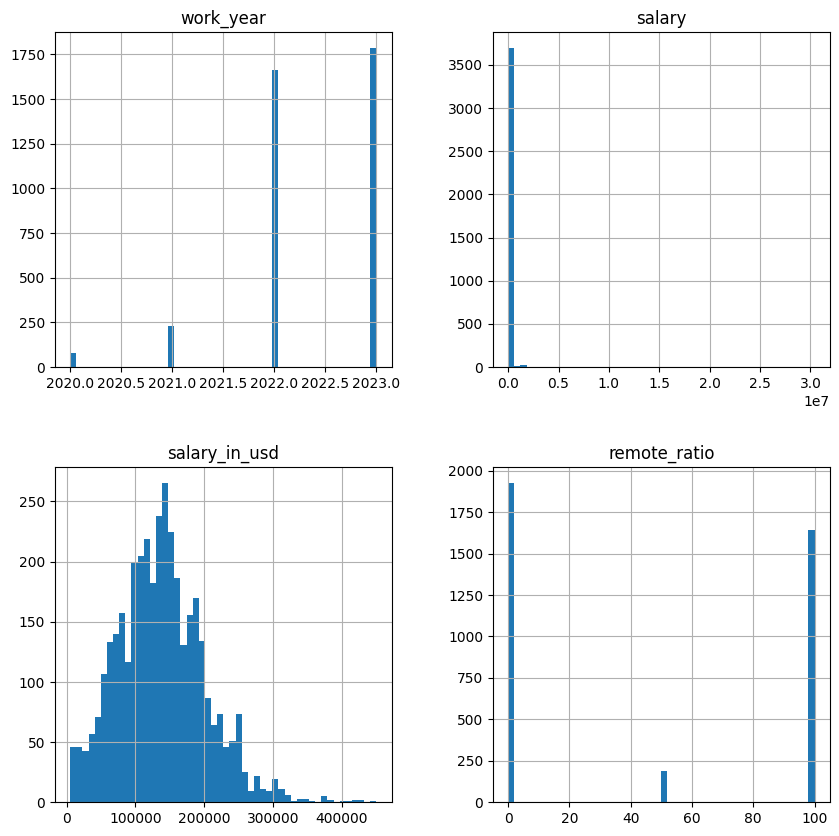

In [133]:
salaries[num_attributes].hist(bins=50, figsize=(10,10))

In [134]:
# Lastly we remove irrelevant attributes
excluded_num_attributes = ["salary", "work_year"] # just keep salary in usd
excluded_cat_attributes = ["salary_currency"]

salaries = salaries.drop(excluded_num_attributes, axis=1)
salaries = salaries.drop(excluded_cat_attributes, axis=1)

In [135]:
# Print cat and num attributes again
cat_attributes = list(salaries.select_dtypes(include=["object"]))
num_attributes = list(salaries.select_dtypes(include=["int64"]))

print("Cat attributes: ", cat_attributes)
print("Num attributes: ", num_attributes)

Cat attributes:  ['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size']
Num attributes:  ['salary_in_usd', 'remote_ratio']


## Transformation pipeline: numerical

In [136]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Imputer and 0-1
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("std_scaler", StandardScaler())
])

## Transformation pipeline: categorical

I will be creating pipeline elements to later create a pipeline that will transform the data.

In [137]:
cat_attributes

['experience_level',
 'employment_type',
 'job_title',
 'employee_residence',
 'company_location',
 'company_size']

### Experience level

In [138]:
salaries["experience_level"].value_counts()

experience_level
SE    2516
MI     805
EN     320
EX     114
Name: count, dtype: int64

In [139]:
from sklearn.preprocessing import OrdinalEncoder

experience_hierarchy = ["EN", "MI", "SE", "EX"]

# Create ordinal encoder
experience_ord_encoder = OrdinalEncoder()

In [140]:
# Print an example
salaries_cat = salaries[["experience_level"]]
salaries_cat_encoded = experience_ord_encoder.fit_transform(salaries_cat)
print(salaries_cat[:10])
print(salaries_cat_encoded[:10])
print(experience_ord_encoder.categories_)

  experience_level
0               SE
1               MI
2               MI
3               SE
4               SE
5               SE
6               SE
7               SE
8               SE
9               SE
[[3.]
 [2.]
 [2.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]]
[array(['EN', 'EX', 'MI', 'SE'], dtype=object)]


### Employment type

In [141]:
salaries["employment_type"].value_counts()

employment_type
FT    3718
PT      17
CT      10
FL      10
Name: count, dtype: int64

In [142]:
from sklearn.preprocessing import OneHotEncoder

# Create one hot encoder
employment_one_hot_encoder = OneHotEncoder()

In [143]:
# Print an example
salaries_cat = salaries[["employment_type"]]
salaries_cat_encoded = employment_one_hot_encoder.fit_transform(salaries_cat)
print(salaries_cat[:10])
print(salaries_cat_encoded[:10].toarray())
print(employment_one_hot_encoder.categories_)

  employment_type
0              FT
1              CT
2              CT
3              FT
4              FT
5              FT
6              FT
7              FT
8              FT
9              FT
[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]
[array(['CT', 'FL', 'FT', 'PT'], dtype=object)]


### Job title

In [144]:
salaries["job_title"].value_counts()

job_title
Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: count, Length: 93, dtype: int64

We are going to create a one hot encoder for the job title to keep info about the job title without creating a lot of columns.

For that:
1. Create a list of unique words in job titles and their frequency
2. Create an empty list "cover_words"
3. Iterate thru the list of unique words and their frequency and add the word to "cover_words":
   1. If words in "cover_words" all appear in all the job titles, True
   2. Else iterate again

In [145]:
word_frequency = salaries["job_title"].str.split(expand=True).stack().value_counts()
word_frequency.head(10)

Data         2944
Engineer     1640
Scientist    1065
Analyst       684
Learning      382
Machine       375
Analytics     137
Research      123
Science       116
Manager       113
Name: count, dtype: int64

In [146]:
def all_covered(word_list, job_title_list):
    '''
    Check that all job_title_list contains at least one word in cover_words
    '''

    for job_title in job_title_list:
        if not any(word in job_title for word in word_list):
            return False

# Get all job titles
job_titles = salaries["job_title"].unique()

# Cover words
cover_words = []

# Iterate over all unique words by frequency and add them to cover_words until all job titles are covered
for word in word_frequency.index:
    cover_words.append(word)
    if all_covered(cover_words, job_titles):
        break

print("Cover words: ", cover_words)

Cover words:  ['Data', 'Engineer', 'Scientist', 'Analyst', 'Learning', 'Machine', 'Analytics', 'Research', 'Science', 'Manager', 'Architect', 'Applied', 'Developer', 'BI', 'Lead', 'ML', 'of', 'AI', 'Vision', 'Computer', 'Consultant', 'Head', 'Business', 'Specialist', 'Infrastructure', 'Software', 'Principal', 'Operations', 'Big', 'ETL', 'Director', 'Researcher', 'Cloud', 'Deep', 'NLP', 'Quality', 'Product', 'Database', 'Intelligence', 'MLOps', '3D', 'Marketing', 'Financial', 'Insight', 'Modeler', 'Strategist', 'Staff', 'Programmer', 'Technician', 'Vehicle', 'Autonomous', 'Management', 'Tech', 'Power', 'DevOps', 'Azure', 'Compliance', 'Finance']


In [147]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

class TopCoverWordsAdder(BaseEstimator, TransformerMixin):
    def __init__(self, cover_words, top_n):
        self.cover_words = cover_words
        self.top_n = top_n

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        new_attributes = pd.DataFrame(np.zeros((len(X), self.top_n)), columns=["job_" + word.lower() for word in self.cover_words[:self.top_n]])
        for i, job_title in enumerate(X["job_title"]):
            for word in job_title.split():
                if word in self.cover_words[:self.top_n]:
                    new_attributes.loc[i, "job_" + word] = 1

        # Fill NaN with 0
        new_attributes = new_attributes.fillna(0)

        # Drop job_title
        X = X.drop("job_title", axis=1)
        return np.c_[X, new_attributes]
    
    def fit_transform(self, X, y=None):
        self.fit(X, y)
        return self.transform(X)

cover_words_adder = TopCoverWordsAdder(cover_words, 10)
salaries_cover_attribs = cover_words_adder.fit_transform(salaries)

### Employee residence

https://en.wikipedia.org/wiki/ISO_3166-1_alpha-2#Officially_assigned_code_elements

In [148]:
salaries["employee_residence"].value_counts().head(15)

employee_residence
US    3004
GB     167
CA      85
ES      80
IN      71
DE      48
FR      38
PT      18
BR      18
GR      16
NL      15
AU      11
MX      10
IT       8
PK       8
Name: count, dtype: int64

In [149]:
GPD_DATASET_PATH = "./datasets/salaries/GPD.csv"

gpd = pd.read_csv(GPD_DATASET_PATH)
gpd.columns = gpd.columns.str.lower()

gpd.head()

,country_name,year,gdp,gdp_per_capita
0,United States,2021,2.299610e+13,69288
1,Luxembourg,2021,8.671080e+10,135683
2,United States,2020,2.089370e+13,63028
3,Luxembourg,2020,7.335313e+10,116356
4,United States,2019,2.137260e+13,65095


In [150]:
import pycountry

def get_iso2(country_name):
    try:
        return pycountry.countries.get(name=country_name).alpha_2
    except:
        return None
    
gpd["iso2"] = gpd["country_name"].apply(get_iso2)

gpd.head()

,country_name,year,gdp,gdp_per_capita,iso2
0,United States,2021,2.299610e+13,69288,US
1,Luxembourg,2021,8.671080e+10,135683,LU
2,United States,2020,2.089370e+13,63028,US
3,Luxembourg,2020,7.335313e+10,116356,LU
4,United States,2019,2.137260e+13,65095,US


In [151]:
# Get max gdp_per_capita for max(year) by country
gpd_max = gpd.loc[gpd.groupby("iso2")["year"].idxmax()]

gpd_max.head(10)

,country_name,year,gdp,gdp_per_capita,iso2
190,Andorra,2021,3.329911e+09,43048,AD
945,Afghanistan,2021,0.000000e+00,0,AF
380,Antigua And Barbuda,2021,1.471126e+09,14901,AG
591,Albania,2021,1.826004e+10,6494,AL
675,Armenia,2021,1.386118e+10,4670,AM
460,Angola,2021,7.254699e+10,2138,AO
195,Argentina,2021,4.914930e+11,10729,AR
910,American Samoa,2021,0.000000e+00,0,AS
131,Austria,2021,4.770820e+11,53268,AT
106,Australia,2021,1.542660e+12,59934,AU


In [155]:
# Create transformer that adds gdp per capita for each country. Removes employee_residence

class GdpPerCapitaEmployeeResidenceAdder(BaseEstimator, TransformerMixin):
    def __init__(self, gdp_df):
        self.gdp_df = gdp_df

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X = X.merge(self.gdp_df, how="left", left_on="employee_residence", right_on="iso2")
        X = X.drop(["iso2", "employee_residence"], axis=1)
        return X
    

gdp_employee_residence_adder = GdpPerCapitaEmployeeResidenceAdder(gpd_max)
salaries_gdp_employee_attribs = gdp_employee_residence_adder.fit_transform(salaries)

### Company location

Same as employee residence

In [157]:
salaries["company_location"].value_counts().head(15)

company_location
US    3040
GB     172
CA      87
ES      77
IN      58
DE      56
FR      34
BR      15
AU      14
GR      14
PT      14
NL      13
MX      10
IE       7
SG       6
Name: count, dtype: int64

In [156]:
class gdpPerCapitaCompanyLocationAdder(BaseEstimator, TransformerMixin):
    def __init__(self, gdp_df):
        self.gdp_df = gdp_df

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X = X.merge(self.gdp_df, how="left", left_on="company_location", right_on="iso2")
        X = X.drop(["iso2", "company_location"], axis=1)
        return X
    
gdp_company_location_adder = gdpPerCapitaCompanyLocationAdder(gpd_max)
salaries_gdp_company_attribs = gdp_company_location_adder.fit_transform(salaries)